# Purpose of the analysis
Look for possible correlations between Economic Freedom and Country's GDP per capita

# Import libraries

In [2]:
import pandas as pd
import numpy as no
import matplotlib as plt
import matplotlib.pyplot as plt

# Read data from CSV

In [3]:
# Source for GDP per capita data: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD
 
# Source for economic freedom data: https://www.heritage.org/index/explore?u=637470799817780528

gdp = pd.read_csv('GDP_per_capita.csv')
ec_index = pd.read_csv('index2021_data.csv')
pd.set_option('display.max_rows', None)

# Clean and Merge data

In [4]:
# Select just the columns from both dataframes that we'll need
gdp =gdp[['Country Name', '2021']]
ec_index = ec_index[['Country Name', '2021 Score']]

# Merge two dataframes
merged_data = pd.merge(gdp, ec_index, on = 'Country Name')

# Rename columns 
merged_data.columns = ['Country Name', 'Value', 'Score']

# Drop empty rows
merged_data = merged_data.dropna(axis = 0, how = 'any')


# Plot data on scatter plot chart

Text(0, 0.5, 'GDP per capital')

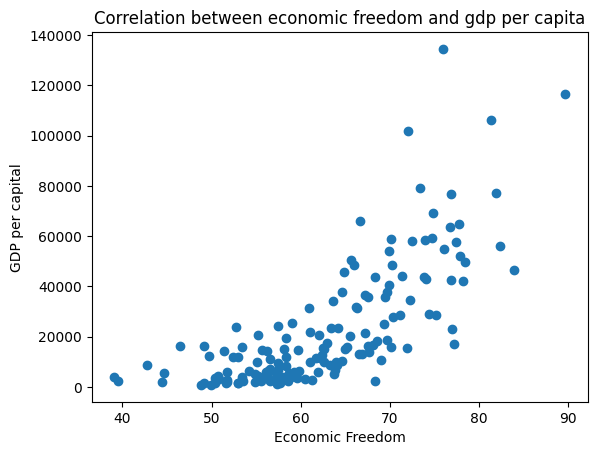

In [19]:
x = merged_data.Score
y = merged_data.Value
plt.scatter(x,y)
plt.title('Correlation between economic freedom and gdp per capita')
plt.xlabel('Economic Freedom')
plt.ylabel('GDP per capital')

If there were absolutely no correlation between a country’s GDP and its index score (or, in other words, the economic freedoms had no impact on production) then you would expect to see the dots spread randomly across both axes. The fact that we can easily see a pattern - the dots are clearly trending towards the top-right of the chart - tells us that higher index scores tend to predict higher GDP.

## Adding Hover visibility and a Regression Line

1. To better understand the data as a whole, I'll import another couple of libraries that are part of the Plotly family of tools. From there, we'll be able to hover over a dot and see the data it represents, we’ll add the hover_data argument and tell it to include Country and Score data.

2. We already saw how our plot showed a visible trend up and to the right. But, we also saw some outliers. To ensure that the outliers are only exceptions and that the overall relationship between the two data sources is sound, I'll add a regression line. This will be a good measure of the strength of the relationship. 

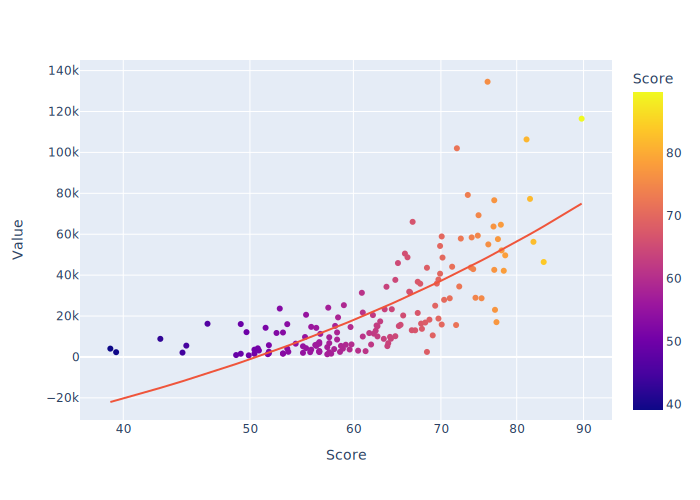

In [24]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "svg"

fig = px.scatter(merged_data, x = 'Score', y = 'Value',  trendline= 'ols', log_x = True, color = 'Score', hover_data=['Country Name', 'Score'])
fig.show()

The chart shows an R^2 value of 0.5518. Or, in other words, around 55% correlation between economic freedoms and productivity.